In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
from Bio import SeqIO
import glob
import copy
import sys
import pysam
import glob
import os
import itertools


In [3]:
PARENT_DIR = '/home/groups/dpwall/briannac/blood_microbiome/'
bam_mappings_file  = '/home/groups/dpwall/briannac/general_data/bam_mappings.csv'
fig_dir = PARENT_DIR + 'results/TB/'
# Input files

virus_file = PARENT_DIR + 'data/virus_no_agg.csv'
bacteria_no_agg_file = PARENT_DIR + 'data/bacteria_no_agg.csv'

In [5]:
sbs=pd.read_csv('/oak/stanford/groups/dpwall/users/briannac/general_data/samples_and_batches.tsv', sep='\t', index_col=0)
bacteria_no_agg = pd.read_csv(bacteria_no_agg_file, index_col=0)


In [143]:
with open('/scratch/users/briannac/blood_microbiome/make_microbe_mats/07C69753.bacteria.txt') as f:
    vals = f.read()

In [145]:
vals = [int(i) for i in vals.split(',')[1:]]

In [151]:
sum(vals[:-2])

203958

In [131]:
to_write = [sample] + [str(counter[i]) for i in idx]
with open('%s/%s.%s.txt' % (file_path_out, sample, contig_type) , "w+") as file_out:
    file_out.write(','.join(to_write))

In [132]:
'%s/%s.%s.txt' % (file_path_out, sample, contig_type)

'/scratch/users/briannac/blood_microbiome/make_microbe_mats/02C10540.bacteria.txt'

In [97]:
myCounter = Counter()
myCounter.update({x:0 for x in bact_contigs + ['ambig']})
contig_counter = myCounter + Counter([r.reference_name for r in accurate_mapping_new]) + Counter(['ambig' for r in ambig_mapping_new]) + Counter(['poor_align' for r in unmapped_new])


In [99]:
contig_counter['ambig']

49301

In [82]:
high_AS = [r for r in reads if (r.get_tag('AS')>=100)]
unmapped = {r for r in reads if r.get_tag('AS')<100}
accurate_mapping = {r.query_name:r for r in high_AS if r.mapq>=13}
ambig_mapping = {r for r in high_AS if r.mapq<13}
unmapped_new = unmapped.difference(accurate_mate_mapping)
accurate_mate_mapping = {r for r in ambig_mapping if (r.query_name in accurate_mapping.keys()) & (r.is_proper_pair)}.union(
                         {r for r in unmapped if (r.query_name in accurate_mapping.keys()) & (r.is_proper_pair)})
ambig_mapping_new = ambig_mapping.difference(accurate_mate_mapping)
accurate_mapping_new = accurate_mate_mapping.union(set(accurate_mapping.values()))

Counter([r.reference_name for r in accurate_mapping_new]).to_

In [76]:
unmapped_new = unmapped.difference(accurate_mate_mapping)
len(unmapped_new)
ambig_new = ambig_mapping.difference(accurate_mate_mapping)

290853

In [11]:
for i,j in zip(sample_and_batches.index, sample_and_batches[1]):
    if i not in bacteria_abundance_agg.index: continue
    if bacteria_abundance_agg.loc[i]['Mycobacterium tuberculosis'] >-1:
        file='s3://ihart-ms2/unmapped/%s/%s/%s.final.paired.aln_all.bam' % (j,i,i)
        print(file)
        with pysam.AlignmentFile(file) as samfile:
            reads = [r for c in bact_contigs for r in samfile.fetch(c) if (~r.is_supplementary & ~r.is_secondary)]
    break

s3://ihart-ms2/unmapped/batch_00927/02C10540/02C10540.final.paired.aln_all.bam


KeyboardInterrupt: 

In [2]:
#bacteria_abundance = pd.read_csv('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/results/paper/bacteria_filtered_abundance_data.csv')
bacteria_abundance_agg = pd.read_csv('/home/groups/dpwall/briannac/blood_microbiome/results_final/bacteria_filt.csv', index_col=0)
bacteria_abundance_agg.index = [i.split(' ')[0] for i in bacteria_abundance_agg.index]
sample_and_batches = pd.read_csv('/home/groups/dpwall/briannac/y_chromosome_mismappings/data/sample_and_batches.csv', sep='\t', header=None, index_col=0)

In [195]:
bacteria_reads = ([r for r in reads if r.get_tag('AS')>=100])
bacteria_reads = ([r for r in reads if r.mapq>=30])


487062

In [8]:
bacteria_abundance_agg[[c for c in bacteria_abundance_agg.columns if 'Mycobacterium tuberculosis' in c]].sort_values('Mycobacterium tuberculosis')

,Mycobacterium tuberculosis
07C70296 - LCL - AU1680,0.0
11C120729_LCL - LCL - AU3713,1.0
05C45125 - LCL - AU1374,1.0
04C37366 - LCL - AU1332,1.0
04C31998 - LCL - AU0033,1.0
...,...
10C111728 - WB - AU3779,656.0
04C37375 - LCL - AU1308,672.0
11C125695 - WB - AU4032,701.0
10C111725 - WB - AU3779,718.0


183318

In [2]:
plt.hist([r.mapq for r in reads])

NameError: name 'plt' is not defined

In [189]:
np.mean(np.array([r.get_tag('AS') for r in reads])>100)

0.673167406520691

In [192]:
sns.heatmap(x=[r.get_tag('AS') for r in reads], y=[r.mapq for r in reads])

TypeError: heatmap() missing 1 required positional argument: 'data'

In [143]:
cov=[t.get_reference_positions() for t in tb_reads if (t.mapq>=55)]
cov = [i for i in itertools.chain.from_iterable(cov)]
idxs=[t.reference_name for t in tb_reads if (t.mapq>=55)  & (t.get_tag('AS')>=100) ]


In [150]:
AS = [t.get_tag('AS') for t in tb_reads if (t.mapq>=55)]

(array([ 33., 217., 351., 603., 591., 495., 258., 432.,  51.,  26.]),
 array([ 22. ,  34.7,  47.4,  60.1,  72.8,  85.5,  98.2, 110.9, 123.6,
        136.3, 149. ]),
 <BarContainer object of 10 artists>)

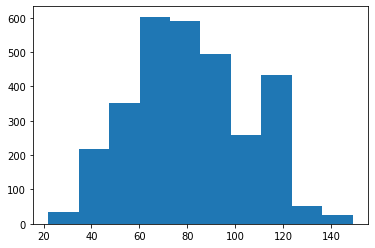

In [152]:
plt.hist(AS)

In [ ]:
with pysam.AlignmentFile('s3://ihart-ms2/unmapped/batch_00024/04C37376/04C37376.final.paired.aln_all.bam') as samfile:
    AS = [r.get_tag('AS') for r in samfile.fetch() if (~r.is_supplementary & ~r.is_secondary) if 'BACT' in r.reference_name]